In [173]:
import numpy as np
import pandas as pd
import scipy.io
import imageio
import cv2
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from numpy import linalg as LNG 
import cv2
import glob
import os
import random
np.random.seed(0)
from scipy.stats import zscore
import os

In [174]:
# reading the tracks matrix
with open('PBD_Share/factorization_data/measurement_matrix.txt') as f:
    lines = f.readlines()
mat = scipy.io.loadmat('PBD_Share/factorization_data/tracks.mat')

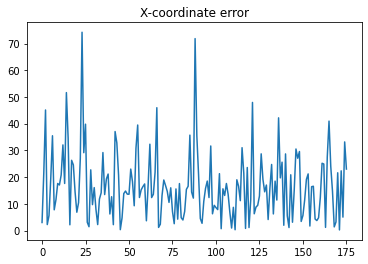

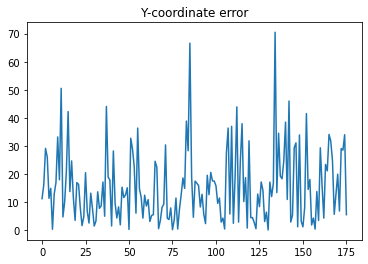

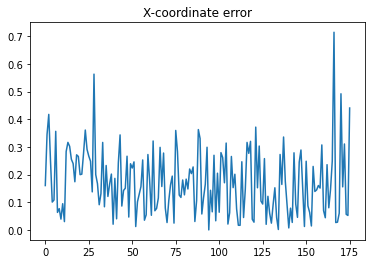

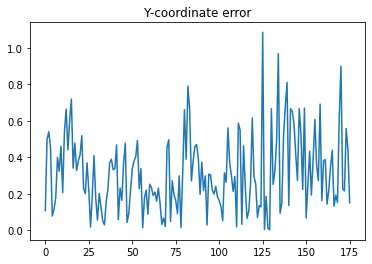

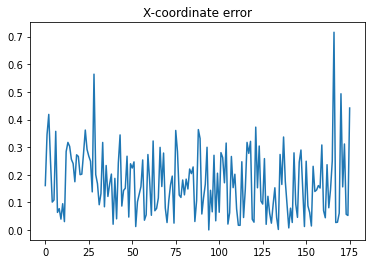

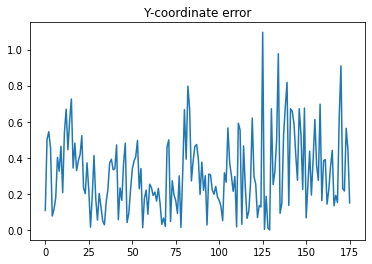

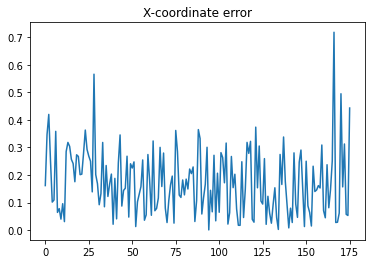

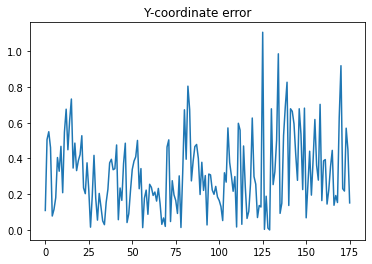

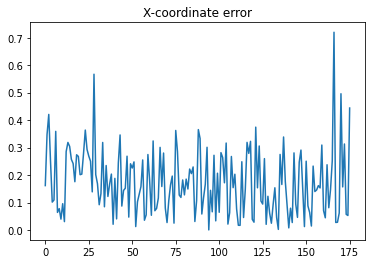

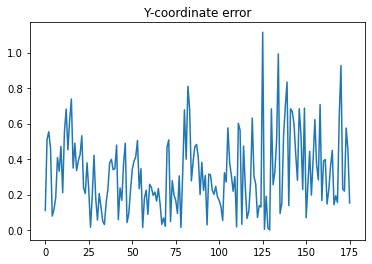

In [175]:
# creating the mask of tracks to be kept(1) and deleted(0)
#delete_r = np.random.randint(0, high=101, size=600, dtype=int)
#delete_r = np.arange(0,101,1)
#delete_c = np.random.randint(0, high=215, size=43, dtype=int)
delete_tracks = np.random.randint(0, high=215, size=[101,43], dtype=int)
mask = np.ones([101,215])
tracks_x = mat["x"]
tracks_x_new = np.copy(tracks_x)
tracks_y = mat["y"]
tracks_y_new = np.copy(tracks_y)
#mask[delete_r,delete_c] = 0
error_x = []
error_y = []
for r in range(101):
    mask[r,delete_tracks[r,:]] = 0
    indexes = np.where(mask[r,:]==1)[0] # where is one in the mask in the rth row 
    # replacing missing tracks with mean from rows/columns
    tracks_x_new[r,delete_tracks[r,:]]= np.mean(tracks_x[i,indexes])
    tracks_y_new[r,delete_tracks[r,:]] = np.mean(tracks_y[i,indexes])
    
#SVD
iterations = 5
for j in range(iterations):
    ux, sx, vhx = np.linalg.svd(tracks_x_new, full_matrices=False)
    uy, sy, vhy = np.linalg.svd(tracks_y_new, full_matrices=False)
    
    # putting eigenvalues to diagonale of the matrix
    sxx = np.diag(sx)
    # zeroing out everything which is higher than rank 4
    sxx[4:,4:] = 0
    syy = np.diag(sy)
    syy[4:,4:] = 0
    
    # Rank 4
    dx = ux@sxx@vhx
    dy = uy@syy@vhy
    
    # Error
    for r in range(101):
        indexes = np.where(mask[r,:]==1)[0]
        e_x = abs(dx[r,indexes] - tracks_x[r,indexes])
        e_y = abs(dy[r,indexes] - tracks_y[r,indexes])
        error_x.append(np.mean(e_x))
        error_y.append(np.mean(e_y))
        
        # Missing data substitution
        tracks_x_new = np.copy(tracks_x)
        tracks_y_new = np.copy(tracks_y)
        tracks_x_new[r,delete_tracks[r,:]] = dx[r,delete_tracks[r,:]]
        tracks_y_new[r,delete_tracks[r,:]]= dy[r,delete_tracks[r,:]]
    plt.figure()
    plt.plot(e_x)
    plt.title("X-coordinate error")
    
    plt.figure()
    plt.plot(e_y)
    plt.title("Y-coordinate error")
    #print(np.mean(error))
    


In [178]:
# creating the mask of tracks to be kept(1) and deleted(0)
#delete_r = np.random.randint(0, high=101, size=600, dtype=int)
#delete_r = np.arange(0,101,1)
#delete_c = np.random.randint(0, high=215, size=43, dtype=int)
delete_tracks = np.random.randint(0, high=215, size=[101,43], dtype=int)
mask = np.ones([101,215])
tracks_x = mat["x"]
tracks_x_new = np.copy(tracks_x)
tracks_y = mat["y"]
tracks_y_new = np.copy(tracks_y)
#mask[delete_r,delete_c] = 0
error_x = []
error_y = []
for r in range(101):
    mask[r,delete_tracks[r,:]] = 0
    indexes = np.where(mask[r,:]==1)[0] # where is one in the mask in the rth row 
    # replacing missing tracks with mean from rows/columns
    tracks_x_new[r,delete_tracks[r,:]]= np.mean(tracks_x[i,indexes])
    tracks_y_new[r,delete_tracks[r,:]] = np.mean(tracks_y[i,indexes])

In [176]:
files = glob.glob("PBD_Share/factorization_data/*.jpg")
files.sort()

In [179]:
import cv2
for im in range(len(files)):
    img = cv2.imread(files[im])
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
    axes[0].imshow(img)
    axes[0].scatter(tracks_x[im,:],tracks_y[im,:], s = 90)
    axes[0].scatter(tracks_x_new[im,:],tracks_y_new[im,:])
    
    axes[1].imshow(img)
    axes[1].scatter(tracks_x[im,delete_tracks[im,:]],tracks_y[im,delete_tracks[im,:]], s = 90)
    axes[1].scatter(tracks_x_new[im,delete_tracks[im,:]],tracks_y_new[im,delete_tracks[im,:]])
    plt.savefig("PBD_Share/factor_new_inicialization/"+str(im)+".png")
    plt.close()
    print(im)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [132]:
tracks_x[delete_r,delete_c]

array([133.13, 391.28, 306.53, 367.13, 445.16, 229.36, 356.29, 394.27,
       395.08, 406.46, 313.69, 371.95, 176.  , 419.53, 395.21, 249.29,
       417.73, 272.01, 390.65, 461.44, 373.95, 442.27, 199.75, 474.73,
       344.57, 360.37, 171.3 , 248.57, 387.9 , 157.59, 434.72, 200.54,
       266.14, 367.73, 431.57, 381.78, 203.11, 315.67, 341.94, 386.94,
       406.85, 323.18, 374.71, 139.55, 304.19, 138.83, 170.16, 455.66,
       415.07, 299.49, 384.7 , 419.7 , 124.09, 421.1 , 259.96, 374.44,
       227.08, 303.49, 311.22, 421.99, 417.33, 367.39, 285.22, 299.39,
       285.35, 393.39, 296.06, 323.09, 321.2 , 125.01, 447.04, 403.31,
       416.42, 194.69, 189.36, 196.27, 351.71, 241.06, 282.85, 148.4 ,
       402.23, 451.47, 285.77, 387.  , 211.19, 393.46, 450.69, 229.62,
       391.58, 385.85, 325.6 , 164.08, 399.39, 426.62, 131.78, 353.92,
       155.56, 322.84, 279.1 , 211.49, 321.6 , 379.91, 366.33, 286.03,
       246.43, 167.56, 235.14, 369.  , 379.02, 393.5 , 403.8 , 428.32,
      

In [152]:
tracks_x_new[delete_r,delete_c]

array([175.14560696, 342.84811352, 190.24296047, 272.99515237,
       191.39384144, 433.27582544, 227.06853855, 352.7585094 ,
       393.60538101, 367.20171269, 329.88996296, 187.33021052,
       386.20766629, 181.97304132, 290.07074916, 213.48228815,
       148.52407603, 402.70423175, 311.11882914, 422.93659391,
       398.7727457 , 284.12059942, 276.60648373, 131.32643573,
       399.00709333, 422.52772421, 416.90390164, 429.25747742,
       322.89904043, 261.08969595, 415.26987523, 136.65561314,
       213.94675822, 345.87295123, 375.07995804, 270.46084322,
       279.20443381, 299.41545278, 433.50341376, 401.52199577,
       265.06590284, 436.45054778, 355.09204549, 438.65059906,
       253.79708593, 332.66480457, 333.83168597, 148.91358178,
       200.58128108, 175.16444192, 343.31619167, 349.70659301,
       428.96209359, 200.9340604 , 324.17707642, 379.82053666,
       442.96779287, 197.34580283, 153.34237369, 168.90644177,
       233.18485971, 272.45464338, 406.08705735, 298.40